# Context
This notebook drives the training process for different models.

In [5]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [6]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.KNN.knn as knn

# Models

## Setup

In [7]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_AH_PF,
  "label_col" : sup.active_hand_col,
  "class_list" : TRAIN_classes,
  "PH2" : False,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 72,
}

train_config = {
  "arch" : sup.TRAIN_KNN_CODE,
  "k" : 1
}


In [8]:
sup.knn_score_tracker = []

model = knn.KNN(data_config=data_config, df=None, train_config=train_config)

In [9]:
model.df

,h0x,h0y,h0z,h1x,h1y,h1z,h2x,h2y,h2z,h3x,...,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z,active_hand
216,-1.360371,-0.571336,-1.385326,-1.409000,-0.650392,0.633135,-1.479157,-0.726917,0.959762,-1.478884,...,0.562333,1.289459,-0.371511,0.146537,1.932786,-0.018014,0.175009,1.702988,-0.189110,1
217,0.612763,1.572302,0.177694,0.499522,1.577426,0.907623,0.418362,1.555721,1.081068,0.381079,...,0.562333,1.289459,-0.371511,0.146537,1.932786,-0.018014,0.175009,1.702988,-0.189110,0
218,-1.395718,-0.576343,-1.233884,-1.433148,-0.650347,0.683695,-1.496679,-0.726580,1.026560,-1.494380,...,0.699209,1.308137,-0.426191,0.061344,1.889948,0.098877,0.180396,1.578370,-0.383243,1
219,0.614999,1.570140,0.170738,0.501866,1.575940,0.946889,0.422648,1.554380,1.113986,0.386705,...,0.699209,1.308137,-0.426191,0.061344,1.889948,0.098877,0.180396,1.578370,-0.383243,0
220,-1.409590,-0.593530,-1.318130,-1.447040,-0.660826,0.739968,-1.506573,-0.733830,1.076750,-1.499939,...,0.640881,1.317126,-0.560435,0.151936,1.944789,-0.117762,0.220667,1.583620,-0.434952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91170,-0.901423,0.851835,0.797370,-0.839242,0.827518,0.075529,-0.732403,0.822833,-0.662122,-0.640428,...,-0.364924,-0.395409,0.060311,-0.115190,-0.092682,0.413863,-0.506813,0.002163,0.245185,0
91171,1.229803,-1.072140,-1.069068,1.312364,-1.098764,-0.582876,1.401198,-1.121437,-0.278775,1.541243,...,-0.410554,-0.339784,0.135724,-0.154812,-0.035286,0.591383,-0.627535,0.049438,0.396934,1
91172,-0.910709,0.853903,0.621872,-0.851093,0.821283,0.236256,-0.738082,0.822853,-0.390077,-0.643263,...,-0.410554,-0.339784,0.135724,-0.154812,-0.035286,0.591383,-0.627535,0.049438,0.396934,0
91173,1.229598,-1.070231,-1.066397,1.316933,-1.097055,-0.653866,1.407612,-1.122938,-0.311796,1.547183,...,-0.490810,-0.367955,0.284146,-0.118408,-0.034456,0.596246,-0.616188,0.024324,0.533210,1


In [10]:
model.fit(verbose=True)

In [11]:
model.test()
model.full_score()

0.9760479041916168
1
0.9760470453241538
0.976085362743848
0.9760398406374502


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


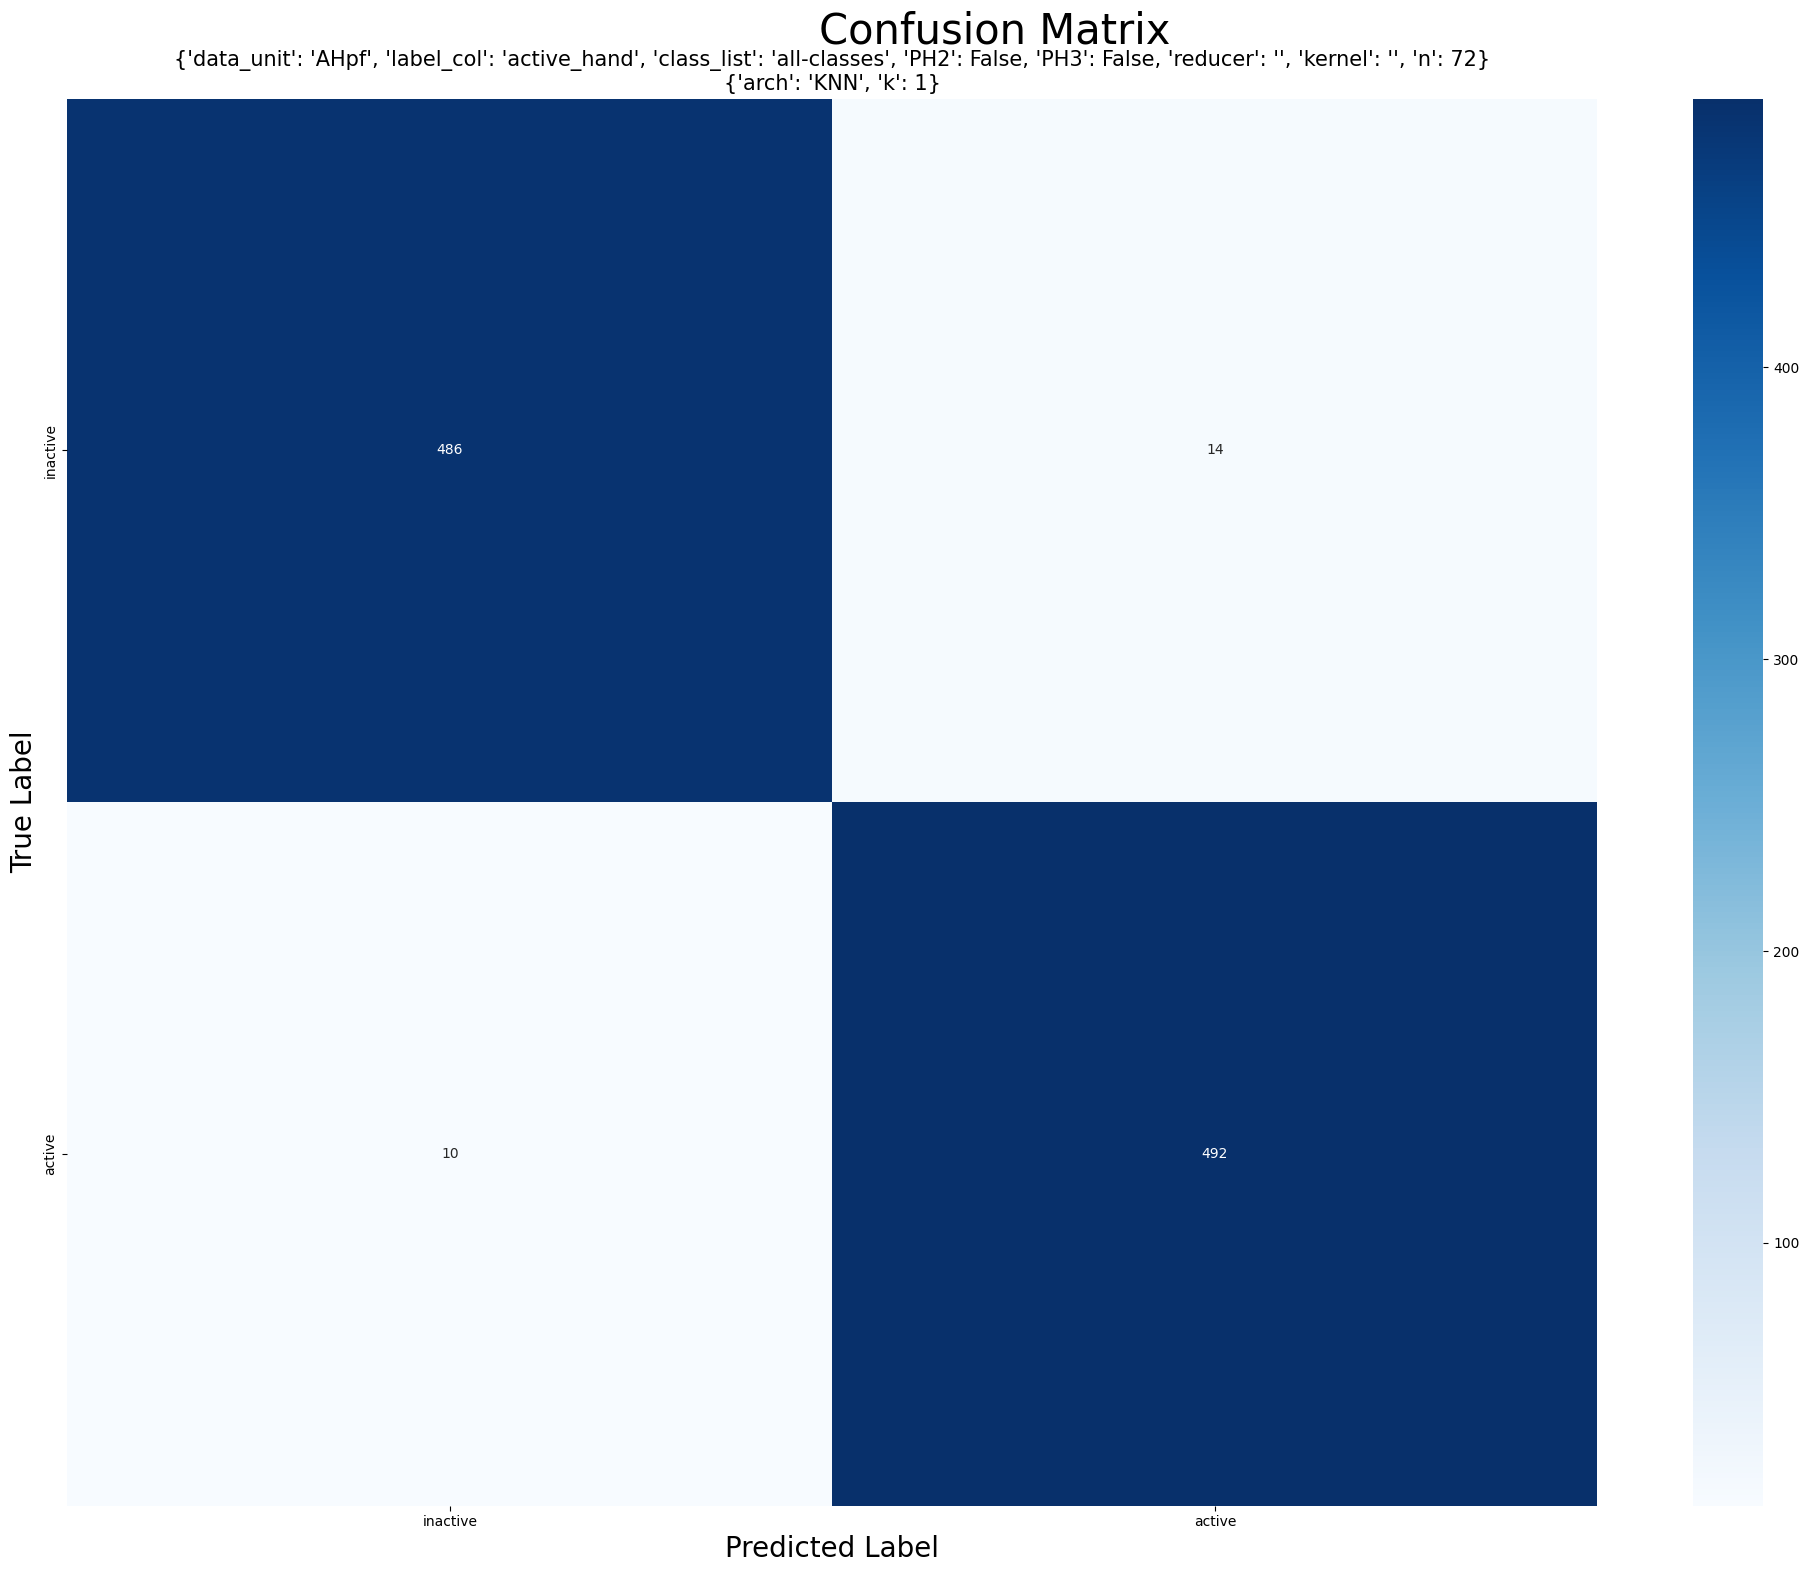

In [12]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_confusion_matrix()

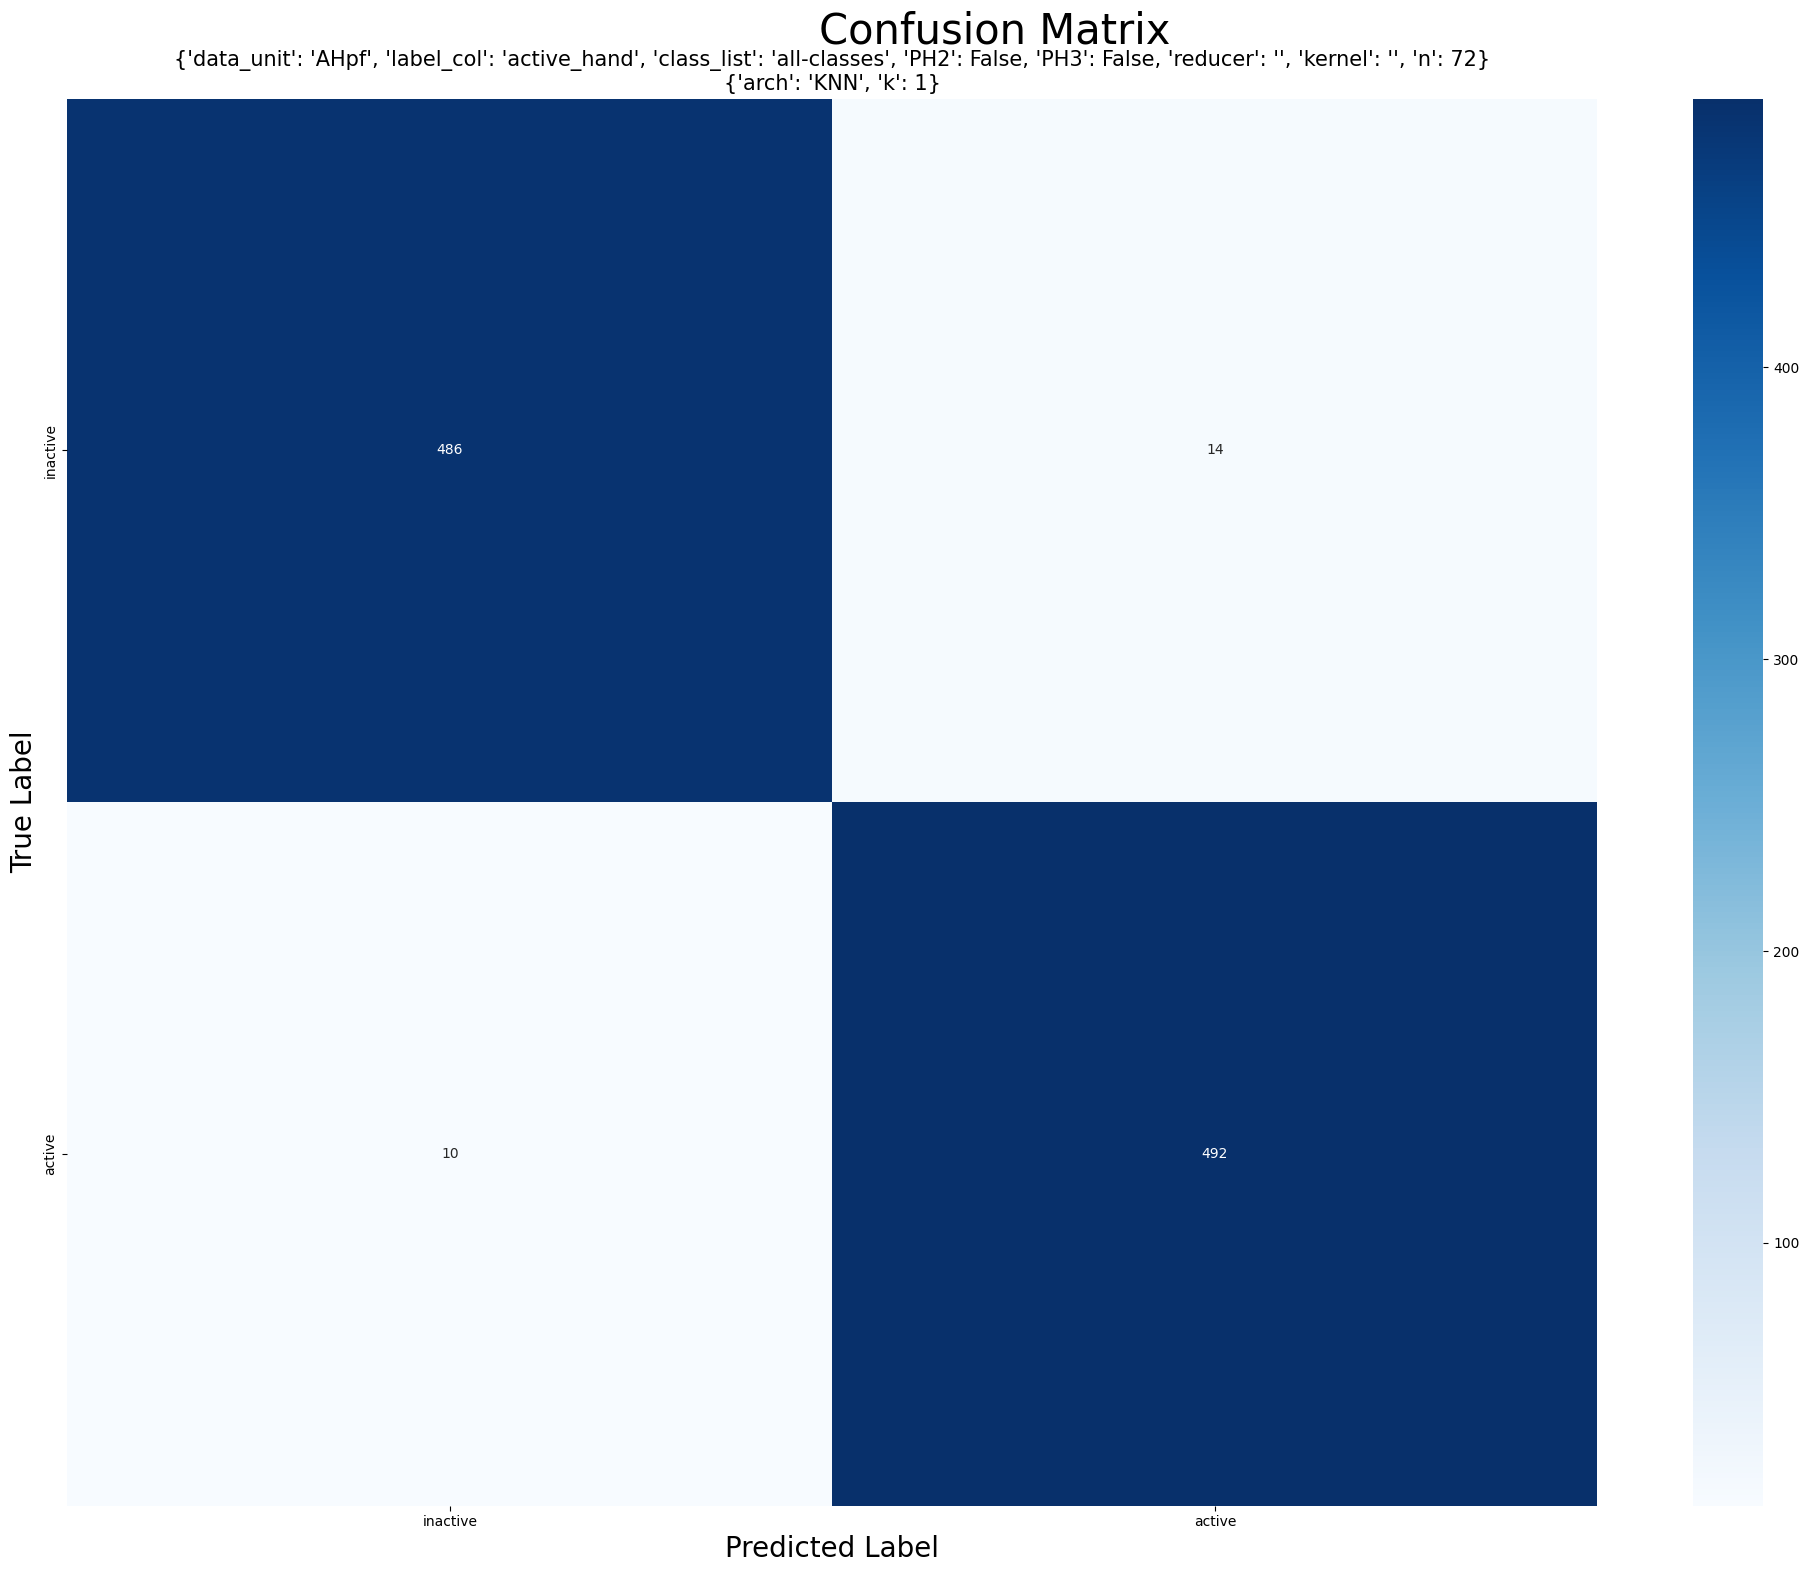

In [13]:
model.keep()